<a href="https://colab.research.google.com/github/mtofighi/TorontoMentalHealth/blob/main/TorontoMentalHealth2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <span style="color:orange">Mental Health Toronto 2014-2020</span>

TBD


In [1]:
!pip install -q pycaret[full]

     |████████████████████████████████| 301 kB 4.4 MB/s 
     |████████████████████████████████| 56 kB 1.3 MB/s 
     |████████████████████████████████| 15.6 MB 370 kB/s 
     |████████████████████████████████| 167 kB 44.4 MB/s 
     |████████████████████████████████| 274 kB 15.9 MB/s 
     |████████████████████████████████| 86 kB 4.1 MB/s 
     |████████████████████████████████| 1.7 MB 33.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 34.1 MB/s 
     |████████████████████████████████| 261 kB 46.2 MB/s 
     |████████████████████████████████| 2.0 MB 31.3 MB/s 
     |████████████████████████████████| 6.8 MB 36.1 MB/s 
     |████████████████████████████████| 114 kB 40.7 MB/s 
     |████████████████████████████████| 564 kB 43.3 MB/s 
     |████████████████████████████████| 40 kB 4.9 MB/s 
     |████████████████████

In [21]:
!pip install matplotlib==3.1.3 

     |████████████████████████████████| 13.1 MB 6.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.3 which is incompatible.
autoviz 0.1.36 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
!wget -q https://github.com/mtofighi/TorontoMentalHealth/blob/main/Dataset/Mental_Health_Act_Apprehensions_clean.csv?raw=true -O mental_clean.csv
!wget -q https://github.com/mtofighi/TorontoMentalHealth/blob/main/Dataset/Persons_in_Crisis_Calls_for_Service_Attended_clean.csv?raw=true -O crisis_clean.csv

## 1.4 Enable  Colab for Colab users:

- PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.
- __[Installing the latest release](https://pycaret.org/install/)__

In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# 2.0 Getting the Data

You can download the data from the original source __[found here](https://github.com/mtofighi/ChilwaBasin/tree/fca7e058e9173b57eef291d3df32b6992ef7c95f/ChilwaHealthModel/Dataset)__ and load it using pandas __[(Learn How)](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)__ or you can use PyCaret's data respository to load the data using the `get_data()` function (This will require internet connection).

Here I read data from my GitHub account.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
mental_data = pd.read_csv('mental_clean.csv')
mental_data = mental_data.dropna()
print(mental_data.shape)
print(mental_data.info())
mental_data.head(5)

(67004, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 67004 entries, 0 to 67003
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   OccurrenceDate       67004 non-null  object
 1   OccurrenceYear       67004 non-null  int64 
 2   OccurrenceMonth      67004 non-null  object
 3   OccurrenceDayofWeek  67004 non-null  object
 4   OccurrenceHour       67004 non-null  int64 
 5   ApprehensionType     67004 non-null  object
 6   Division             67004 non-null  object
 7   HoodID               67004 non-null  object
 8   NeighbourhoodName    67004 non-null  object
 9   PremisesType         67004 non-null  object
 10  Sex                  67004 non-null  object
 11  AgeGroup             67004 non-null  object
dtypes: int64(2), object(10)
memory usage: 6.6+ MB
None


,OccurrenceDate,OccurrenceYear,OccurrenceMonth,OccurrenceDayofWeek,OccurrenceHour,ApprehensionType,Division,HoodID,NeighbourhoodName,PremisesType,Sex,AgeGroup
0,2014/01/01 05:00:00+00,2014,January,Wednesday,1,Mha Sec 17 (Power Of App),D51,71,Cabbagetown-South St.James Town (71),Apartment,Male,45 to 54
1,2014/01/01 05:00:00+00,2014,January,Wednesday,0,Mha Sec 17 (Power Of App),D23,7,Willowridge-Martingrove-Richview (7),House,Female,45 to 54
2,2014/01/01 05:00:00+00,2014,January,Wednesday,2,Mha Sec 17 (Power Of App),D53,55,Thorncliffe Park (55),Outside,Male,35 to 44
3,2014/01/01 05:00:00+00,2014,January,Wednesday,6,Mha Sec 17 (Power Of App),NSA,NSA,NSA,Outside,Female,55 to 64
4,2014/01/01 05:00:00+00,2014,January,Wednesday,9,Mha Sec 17 (Power Of App),D32,32,Englemount-Lawrence (32),Apartment,Male,25 to 34


In [6]:
# This command will basically import all the modules from pycaret that are necessary for classification tasks
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [7]:
mental_features = mental_data.drop( ['OccurrenceDate','OccurrenceYear','HoodID'], axis=1)
for col in ['OccurrenceHour']:
    mental_features[col] = mental_features[col].astype('category')
mental_features.head(3)

,OccurrenceMonth,OccurrenceDayofWeek,OccurrenceHour,ApprehensionType,Division,NeighbourhoodName,PremisesType,Sex,AgeGroup
0,January,Wednesday,1,Mha Sec 17 (Power Of App),D51,Cabbagetown-South St.James Town (71),Apartment,Male,45 to 54
1,January,Wednesday,0,Mha Sec 17 (Power Of App),D23,Willowridge-Martingrove-Richview (7),House,Female,45 to 54
2,January,Wednesday,2,Mha Sec 17 (Power Of App),D53,Thorncliffe Park (55),Outside,Male,35 to 44


In [8]:
mental_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67004 entries, 0 to 67003
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OccurrenceMonth      67004 non-null  object  
 1   OccurrenceDayofWeek  67004 non-null  object  
 2   OccurrenceHour       67004 non-null  category
 3   ApprehensionType     67004 non-null  object  
 4   Division             67004 non-null  object  
 5   NeighbourhoodName    67004 non-null  object  
 6   PremisesType         67004 non-null  object  
 7   Sex                  67004 non-null  object  
 8   AgeGroup             67004 non-null  object  
dtypes: category(1), object(8)
memory usage: 4.7+ MB


In [40]:
# Setting up the classifier
# Pass the complete dataset as data and the featured to be predicted as target
import imblearn

clf=setup(data=mental_features,target='ApprehensionType', fix_imbalance = True, 
          fix_imbalance_method= imblearn.under_sampling.RandomUnderSampler(random_state=123, replacement=False), use_gpu = True)

,Description,Value
0,session_id,4179
1,Target,ApprehensionType
2,Target Type,Multiclass
3,Label Encoded,"Mha Sec 15 (Form 1): 0, Mha Sec 16 (Form 2): 1..."
4,Original Data,"(67004, 9)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [41]:
mental_features['ApprehensionType'].value_counts()

Mha Sec 17 (Power Of App)        52139
Mha Sec 15 (Form 1)               6286
Mha Sec 16 (Form 2)               4842
Mha Sec 33.4 (Form 47 Cto)        2670
Mha Sec 28(1) (Form 9 Elopee)     1067
Name: ApprehensionType, dtype: int64

In [44]:
# This model will be used to compare all the model along with the cross validation
best = compare_models(include = ['rf', 'dt'], budget_time = 0.5, fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5156,0.7795,0.4942,0.7731,0.5906,0.2119,0.2539,2.957
dt,Decision Tree Classifier,0.4015,0.6184,0.3987,0.7321,0.4841,0.1224,0.1561,0.196


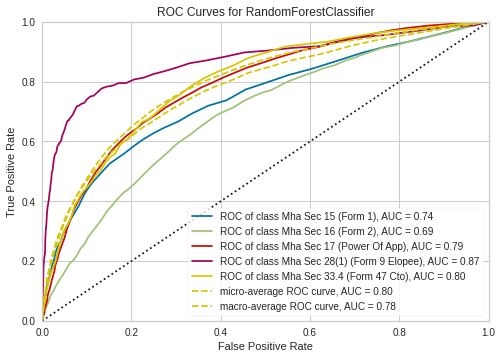

In [45]:
plot_model(best, plot = 'auc')

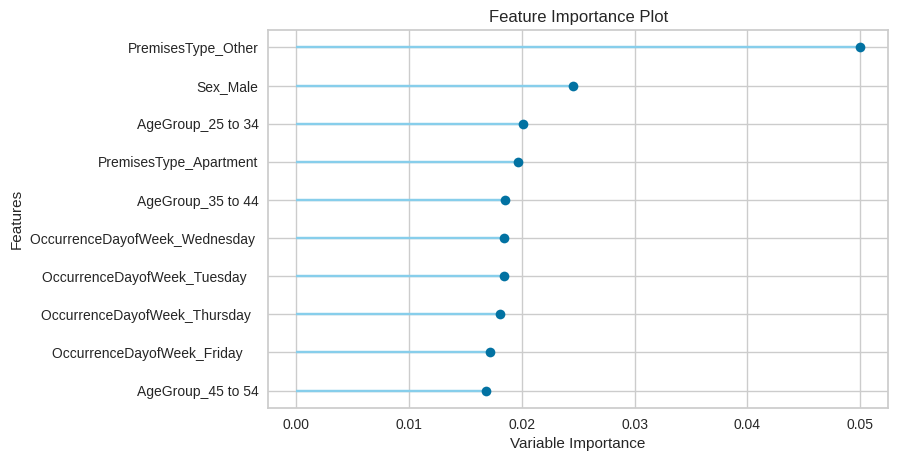

In [46]:
plot_model(best, plot = 'feature')

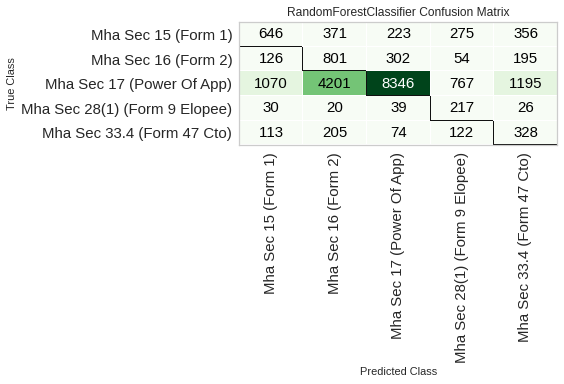

In [47]:
plot_model(best, plot = 'confusion_matrix')